In [2]:
import pandas as pd 

# create gpa train data 
train = pd.DataFrame({'Admitted': [1, 1, 1,1, 1, 0, 1, 1, 0, 1,1,1, 1,1,0, 1, 0, 0, 0, 0, 0, 0, 0, 0 ,0 ,0, 1,1,1,1, 0], 
                    'GPA': [2.8, 3.3, 3.7, 3.7, 3.7, 3.3, 3.7, 3, 1.7, 3.6, 3.3, 4, 3.2, 3.4, 2.8, 4, 1.5, 2.7, 2.3, 2.3, 2.7, 2.2, 3.3,3.3, 4, 2.3, 3.6, 3.4, 4, 3.7, 2.3], 
                    'Exp': [8, 6, 5, 5, 6, 3, 4, 2, 1, 5, 5, 3, 6,5, 4, 4, 4, 1, 1, 2, 2, 2, 1, 4, 4, 4, 5, 2, 4, 6, 3]}) 
train.head() 

,Admitted,GPA,Exp
0,1,2.8,8
1,1,3.3,6
2,1,3.7,5
3,1,3.7,5
4,1,3.7,6


In [3]:
# create a testing dataset for this model. 
test = pd.DataFrame({'Admitted': [1, 0, 1, 0, 1], 
                    'GPA': [2.9, 2.4, 3.8, 3, 3.3], 
                    'Exp': [9, 1, 6, 1,4 ]}) 
test.head() 

,Admitted,GPA,Exp
0,1,2.9,9
1,0,2.4,1
2,1,3.8,6
3,0,3.0,1
4,1,3.3,4


In [4]:
# We will use Logit from statsmodels.  

import statsmodels.formula.api as smf 
#fit logistic regression 
model = smf.logit('Admitted ~ GPA + Exp', data =train).fit() 
#summary  
model.summary() 

Optimization terminated successfully.
         Current function value: 0.316480
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                   31
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                  0.5403
Time:                        21:16:53   Log-Likelihood:                -9.8109
converged:                       True   LL-Null:                       -21.342
Covariance Type:            nonrobust   LLR p-value:                 9.818e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.4485      4.320     -2.650      0.008     -19.915      -2.982
GPA            2.7606      1.291      2.139      0.032       0.231       5.290
Exp            0.7569      0.383      1.977      0.048       0.006       1.507
==============================================================================
"""

Test accuracy =  1.0


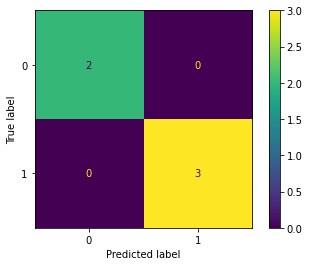

In [5]:
# confusion_matrix and accuracy_score to compute the accuracy of the model on the test set

from sklearn.metrics import confusion_matrix, accuracy_score,  ConfusionMatrixDisplay 
# X_test and y_test 
X_test = test[['GPA', 'Exp']] 
y_test = test['Admitted'] 
#  
y_hat = model.predict(X_test) 
pred = list(map(round, y_hat))  
# confusion matrix 
cm = confusion_matrix(y_test, pred)  
ConfusionMatrixDisplay(cm).plot() 

# Accuracy 
print('Test accuracy = ', accuracy_score(y_test, pred))